In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
# import seawater as sw
import datetime

import multiprocessing
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots
CPU times: user 1.55 s, sys: 1.18 s, total: 2.73 s
Wall time: 3.75 s


In [36]:
path_data = '/pool/data/ICDC/ocean/aviso_ssh/DATA/2019/'
fname = 'dt_global_twosat_phy_l4_20191228_vDT2018.nc' #last
fname = 'dt_global_twosat_phy_l4_20190102_vDT2018.nc' #first

In [125]:
lon = np.linspace(-180,180, 1440) +180

In [128]:
ds = xr.open_dataset(path_data + fname)
#ds = ds.assign_coords(longitude=lon)
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-02
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
Data variables:
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    err        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-01-02T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-01-02T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

<ipython-input-129-0cf6d2f80f5a>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.longitude, ds.latitude, ds.isel(time = 0).sla)


Text(0, 0.5, 'latitutde')

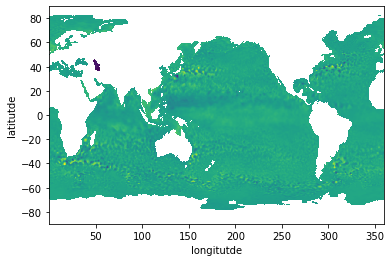

In [129]:
plt.pcolormesh(ds.longitude, ds.latitude, ds.isel(time = 0).sla)
plt.xlabel('longitutde')
plt.ylabel('latitutde')

In [110]:
ds.isel(time = 0).sla.shape

(720, 1440)

In [133]:
360-75

285

In [146]:
#ds = ds.isel(time = 0)
h = ds.sla
lon = [285, 350]
#lon = [-95, -10]
lat = [39.2, 40]
s_lon = h.where((h.latitude > lat[0]) & (h.latitude < lat[1]) & (h.longitude > lon[0]) & (h.longitude < lon[1]), drop=True)

In [147]:
s_lon = s_lon.isel(time=0)

<ipython-input-148-65b9f03a6352>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(s_lon.longitude, s_lon.latitude, s_lon)


Text(0, 0.5, 'latitutde')

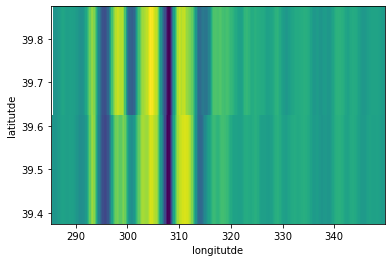

In [148]:
plt.pcolormesh(s_lon.longitude, s_lon.latitude, s_lon)
plt.xlabel('longitutde')
plt.ylabel('latitutde')

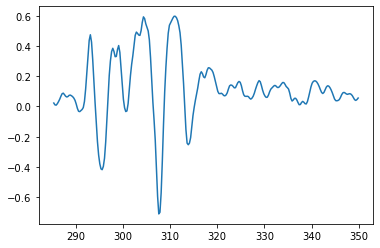

In [149]:
plt.plot(s_lon.longitude,s_lon[0,:])

In [150]:
s_lon.to_netcdf('s_lon.nc')

In [65]:
s_lon

<xarray.DataArray 'sla' (latitude: 40, longitude: 260)>
array([[   nan,    nan,    nan, ..., 0.1953, 0.1983, 0.1991],
       [   nan,    nan,    nan, ..., 0.1929, 0.1859, 0.1819],
       [   nan,    nan,    nan, ..., 0.1669, 0.1548, 0.1502],
       ...,
       [   nan,    nan,    nan, ..., 0.1806, 0.2259, 0.2756],
       [   nan,    nan,    nan, ..., 0.1195, 0.1618, 0.2226],
       [   nan,    nan,    nan, ..., 0.0566, 0.074 , 0.1221]])
Coordinates:
    time       datetime64[ns] 2019-01-02
  * latitude   (latitude) float32 30.12 30.38 30.62 30.88 ... 39.38 39.62 39.88
  * longitude  (longitude) float64 -74.93 -74.68 -74.43 ... -10.63 -10.38 -10.13
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

In [66]:
s_lon.longitude[1]-s_lon.longitude[0]

<xarray.DataArray 'longitude' ()>
array(0.25017373)
Coordinates:
    time     datetime64[ns] 2019-01-02

# multiple satellite data sets

In [162]:
path_data = '/pool/data/ICDC/ocean/aviso_ssh/DATA/2019/'
fname = 'dt_global_twosat_phy_l4_20191228_vDT2018.nc' #last
#### flist
search_str = f'dt_global_twosat_phy_l4_*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()
flist = flist[:90]

ds = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1)) # **mfdset_kwargs, **mfdset_kwargs

In [163]:
ds

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-03-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

<ipython-input-166-11e9f0c2f9a6>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.longitude, ds.latitude, ds.isel(time = 50).sla)


Text(0, 0.5, 'latitutde')

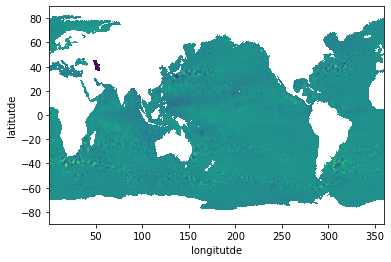

In [166]:
plt.pcolormesh(ds.longitude, ds.latitude, ds.isel(time = 50).sla)
plt.xlabel('longitutde')
plt.ylabel('latitutde')

In [221]:

h = ds.sla
lon = [285, 350]
lat = [39.8, 40]
s_lon = h.where((h.latitude > lat[0]) & (h.latitude < lat[1]) & (h.longitude > lon[0]) & (h.longitude < lon[1]), drop=True)

In [222]:
s_lon = s_lon.drop('latitude')
s_lon = s_lon.squeeze()

Text(0, 0.5, 'ssh (m)')

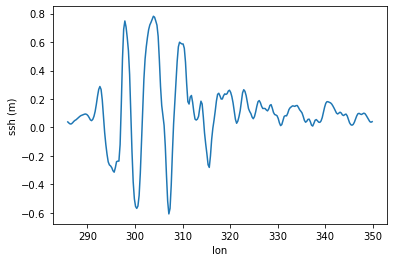

In [225]:
plt.plot(s_lon.longitude,  s_lon.isel(time = 10))
plt.xlabel('lon')
plt.ylabel('ssh (m)')

In [226]:
s_lon.to_netcdf('s_lon_time.nc')

# multiple datasets sst

In [106]:
path_data = '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/'
fname = 'MODIS-AQUA__C6__SST_v2019.0__4km__20100112__UHAM-ICDC__fv0.02.nc' #last
#### flist
search_str = f'MODIS-AQUA__C6__SST_v2019.0__4km_*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()
flist = flist[:4]

ds = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1)) # **mfdset_kwargs, **mfdset_kwargs

In [107]:
flist

array(['/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/MODIS-AQUA__C6__SST_v2019.0__4km__20100101_20100131__UHAM-ICDC__fv0.02.nc',
       '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/MODIS-AQUA__C6__SST_v2019.0__4km__20100201_20100228__UHAM-ICDC__fv0.02.nc',
       '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/MODIS-AQUA__C6__SST_v2019.0__4km__20100301_20100331__UHAM-ICDC__fv0.02.nc',
       '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/MODIS-AQUA__C6__SST_v2019.0__4km__20100401_20100430__UHAM-ICDC__fv0.02.nc'],
      dtype='<U128')

In [108]:
ds

<xarray.Dataset>
Dimensions:       (lat: 4320, lon: 8640, time: 4)
Coordinates:
  * lat           (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon           (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time          (time) datetime64[ns] 2010-01-16 2010-02-13 ... 2010-04-15
Data variables:
    sst_night     (time, lat, lon) float32 dask.array<chunksize=(1, 4320, 8640), meta=np.ndarray>
    sst_night_qf  (time, lat, lon) float32 dask.array<chunksize=(1, 4320, 8640), meta=np.ndarray>
    sst_day       (time, lat, lon) float32 dask.array<chunksize=(1, 4320, 8640), meta=np.ndarray>
    sst_day_qf    (time, lat, lon) float32 dask.array<chunksize=(1, 4320, 8640), meta=np.ndarray>
Attributes: (12/27)
    Conventions:                CF-1.6
    title:                      MODIS-AQUA Collection 6 monthly (mean) sea su...
    summary:                    MODIS-AQUA Collection 6 monthly (mean) sea su...
    institution:                Center for Earth System Research and Sustaina...
    creator_url:                http://icdc.cen.uni-hamburg.de
    creator_name:               Integrated Climate Data Center (ICDC)
    ...                         ...
    platform:                   EOS-AQUA
    sensor:                     MODIS
    version:                    R2019.0
    source:                     http://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua...
    references:                 1) http://oceancolor.gsfc.nasa.gov/cms/techdo...
    citation:                   NASA Goddard Space Flight Center, Ocean Ecolo...

<ipython-input-111-26420c2c7af9>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon, ds.lat, ds.isel(time = 1).sst_day)


Text(0, 0.5, 'latitutde')

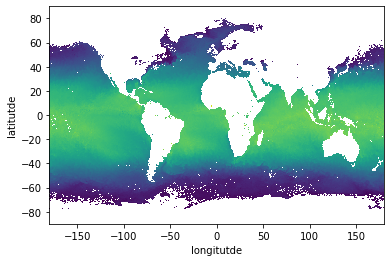

In [111]:
plt.pcolormesh(ds.lon, ds.lat, ds.isel(time = 1).sst_day)
plt.xlabel('longitutde')
plt.ylabel('latitutde')

In [98]:

h = ds.sst_day
lon = [-75, -10]
lat = [39.95, 40]
s_lon = h.where((h.lat > lat[0]) & (h.lat < lat[1]) & (h.lon > lon[0]) & (h.lon < lon[1]), drop=True)
#s_lon = s_lon.drop('lat')
s_lon

<xarray.DataArray 'sst_day' (time: 3, lat: 2, lon: 1560)>
dask.array<where, shape=(3, 2, 1560), dtype=float32, chunksize=(1, 2, 1560), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 39.98 39.94
  * lon      (lon) float32 -74.98 -74.94 -74.9 -74.85 ... -10.1 -10.06 -10.02
  * time     (time) datetime64[ns] 2010-01-16 2010-02-13 2010-03-16
Attributes:
    long_name:    Sea surface temperature at day
    units:        degree Celsius
    valid_range:  [-200 4500]

In [57]:
#s_lon = s_lon.drop('lat')
#s_lon = s_lon.squeeze()
#s_lon = s_lon.isel(lat=0)

Text(0, 0.5, 'sst (C°)')

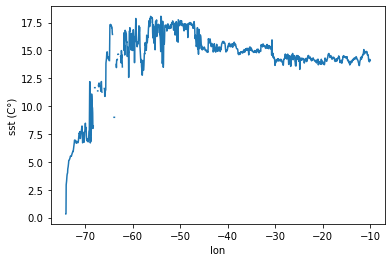

In [105]:
#plt.plot(s_lon.lon,  s_lon.isel().isel(time = 0))
plt.plot(s_lon.lon,  s_lon.isel(lat=0).isel(time = 1))
#plt.plot(s_lon.lon,  s_lon.isel().isel(time = 2))
plt.xlabel('lon')
plt.ylabel('sst (C°)')

In [72]:
s_lon.to_netcdf('sst_m_sat_day.nc')